## Лабораторная работа по курсу "Искусственный интеллект"
## Многослойный персептрон

| Студент | Гамов Павел Антонович |
|---------|--------|
| Группа  | м80-407б-18     |
| N | 4 |
| Вариант | 2 |

Для начала, скачаем датасет MNIST. Используйте `wget` или `curl`, либо скачайте вручную [по ссылке](https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/Data/MNIST/mnist.pkl.gz).

In [1]:
#!wget https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/Data/MNIST/mnist.pkl.gz
!curl -o mnist.pkl.gz https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/Data/MNIST/mnist.pkl.gz
!gzip -d mnist.pkl.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 17  9.9M   17 1735k    0     0  1735k      0  0:00:05  0:00:01  0:00:04 1681k
 41  9.9M   41 4199k    0     0  2099k      0  0:00:04  0:00:02  0:00:02 2066k
 66  9.9M   66 6711k    0     0  2237k      0  0:00:04  0:00:03  0:00:01 2213k
 90  9.9M   90 9207k    0     0  2301k      0  0:00:04  0:00:04 --:--:-- 2283k
100  9.9M  100  9.9M    0     0  2537k      0  0:00:04  0:00:04 --:--:-- 2319k
"gzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
print(tf.__version__)

2.6.0


Теперь загружаем датасет:

In [3]:
import pickle
with open('mnist.pkl','rb') as f:
    MNIST = pickle.load(f)

In [4]:
labels = MNIST['Train']['Labels']
data = MNIST['Train']['Features']

Смотрим на то, какие данные получились:

In [5]:
data.shape

(42000, 784)

Используйте Scikit Learn для разбиения данных на обучающую и тестовую выборку

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_learn, x_test, y_learn, y_test = train_test_split(data,labels,test_size=0.2,train_size=0.8)

Нормируем входные данные

In [8]:
x_learn = np.array([data / 255 for data in x_learn])
x_test = np.array([data / 255 for data in x_test])

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(784,)),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10)
])

Пока что модель не обучена

In [10]:
predictions = model(x_test[:15]).numpy()

In [11]:
[np.argmax(x) for x in predictions]

[5, 1, 4, 5, 5, 5, 5, 5, 5, 5, 2, 5, 1, 5, 5]

In [12]:
list(y_test[:15])

[9, 1, 7, 6, 9, 4, 8, 7, 6, 7, 0, 4, 9, 9, 1]

In [13]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [14]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

Теперь обучим модель и сохраним историю

In [15]:
history = model.fit(x_learn, y_learn, epochs=10)

Epoch 1/10
1050/1050 [==============================] - 1s 578us/step - loss: 0.7490 - accuracy: 0.7710
Epoch 2/10
1050/1050 [==============================] - 1s 595us/step - loss: 0.3435 - accuracy: 0.9026
Epoch 3/10
1050/1050 [==============================] - 1s 626us/step - loss: 0.2995 - accuracy: 0.9141
Epoch 4/10
1050/1050 [==============================] - 1s 579us/step - loss: 0.2763 - accuracy: 0.9206
Epoch 5/10
1050/1050 [==============================] - 1s 614us/step - loss: 0.2618 - accuracy: 0.9245
Epoch 6/10
1050/1050 [==============================] - 1s 601us/step - loss: 0.2521 - accuracy: 0.9265
Epoch 7/10
1050/1050 [==============================] - 1s 594us/step - loss: 0.2423 - accuracy: 0.9275
Epoch 8/10
1050/1050 [==============================] - 1s 622us/step - loss: 0.2349 - accuracy: 0.9307
Epoch 9/10
1050/1050 [==============================] - 1s 591us/step - loss: 0.2286 - accuracy: 0.9328
Epoch 10/10
1050/1050 [==============================] - 1s 622u

Проверим как теперь модель распознает картинки из тестовой даты

In [16]:
predictions = model(x_test[:15]).numpy()

In [17]:
[np.argmax(x) for x in predictions]

[9, 1, 7, 6, 9, 4, 8, 7, 6, 7, 0, 4, 9, 9, 1]

In [18]:
list(y_test[:15])

[9, 1, 7, 6, 9, 4, 8, 7, 6, 7, 0, 4, 9, 9, 1]

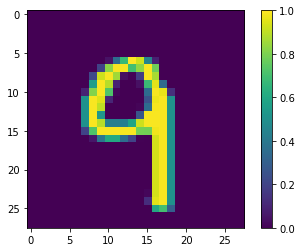

In [19]:
plt.figure()
plt.imshow(np.resize(x_test[0],(28,28)))
plt.colorbar()
plt.grid(False)
plt.show()

График accuracy и loss

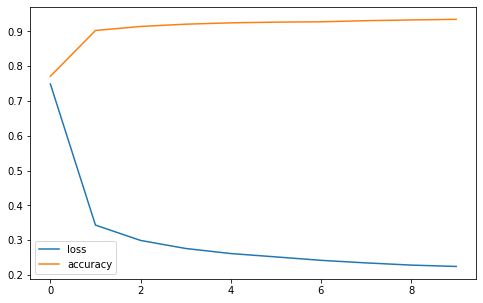

In [20]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

Ошибка на всем тестовом датасете

In [21]:
model.test_on_batch(x_test,y_test)

[0.23288950324058533, 0.9320714473724365]

## FashionMNIST

In [22]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [23]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

Пока модель не обучена, убедимся в этом

In [24]:
predictions = model(x_test[:15]).numpy()

In [25]:
[np.argmax(x) for x in predictions]

[6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

In [26]:
list(y_test[:15])

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4]

In [27]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [28]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

Обучим модель

In [29]:
history = model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 2s 879us/step - loss: 1.8829 - accuracy: 0.7387
Epoch 2/15
1875/1875 [==============================] - 2s 884us/step - loss: 0.6112 - accuracy: 0.79670s - loss: 0.626
Epoch 3/15
1875/1875 [==============================] - 2s 838us/step - loss: 0.5634 - accuracy: 0.8080
Epoch 4/15
1875/1875 [==============================] - 2s 829us/step - loss: 0.5203 - accuracy: 0.8214
Epoch 5/15
1875/1875 [==============================] - 2s 853us/step - loss: 0.4821 - accuracy: 0.8333
Epoch 6/15
1875/1875 [==============================] - 2s 860us/step - loss: 0.4622 - accuracy: 0.83780s - loss: 0.4649 
Epoch 7/15
1875/1875 [==============================] - 2s 863us/step - loss: 0.4357 - accuracy: 0.8474
Epoch 8/15
1875/1875 [==============================] - 2s 843us/step - loss: 0.4163 - accuracy: 0.8530
Epoch 9/15
1875/1875 [==============================] - 2s 853us/step - loss: 0.4025 - accuracy: 0.8571
Epoch 10/15
1875/1875 [=======

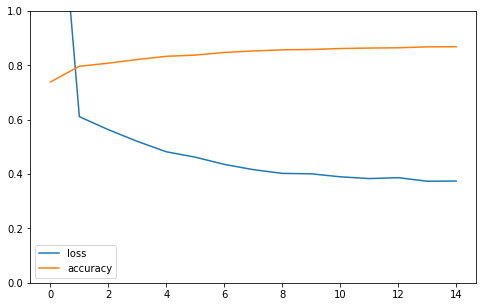

In [38]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylim(0, 1.0)
plt.show()

Проверим насколько у нее получается распозновать

In [39]:
predictions = model(x_test[:15]).numpy()

In [40]:
[np.argmax(x) for x in predictions]

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4]

In [41]:
list(y_test[:15])

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4]

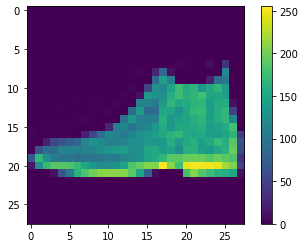

In [42]:
plt.figure()
plt.imshow(x_test[0])
plt.colorbar()
plt.grid(False)
plt.show()

Ошибка на тестовом датасете

In [43]:
model.test_on_batch(x_test,y_test)

[0.5131224393844604, 0.8431000113487244]